In [6]:
%pip install missingno 
%pip install geopy
%pip install folium
%pip install plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px
from scipy.ndimage import gaussian_filter1d
from datetime import timedelta

df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


- Terdapat 15854 baris dan 17 columns di dataset airbnb listing bangkok
- akan dilakukan drop pada kolom Unnamed karena hanya perulangan pada index saja

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

In [9]:

# Unique Data
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

def unique_data(df):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique()[:5] for col in (df.columns)]  
    return data_unique


unique_data(df)

,Columns,Unique Count,Unique
0,id,15854,"[27934, 27979, 28745, 35780, 941865]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint]"
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315]"
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem]"
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, Bang Kho laen]"
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76872]"
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 100.63338]"
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Shared room]"
8,price,3040,"[1905, 1316, 800, 1286, 1000]"
9,minimum_nights,86,"[3, 1, 60, 7, 250]"


Based on data sampling for unique data:
1. This dataset have 15,854 rows and 16 columns.
2. *missing value* found in `name`, `host_name`, `last_review`, and `reviews_per_month`
3. No Duplicate found

## Missing Value

In [10]:
missing_data = pd.DataFrame({
    'Missing Count': df.isna().sum(),
    'Percentage Missing': (df.isna().sum() / len(df)) * 100})
missing_data

,Missing Count,Percentage Missing
id,0,0.000000
name,8,0.050460
host_id,0,0.000000
host_name,1,0.006308
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000
minimum_nights,0,0.000000


<Axes: >

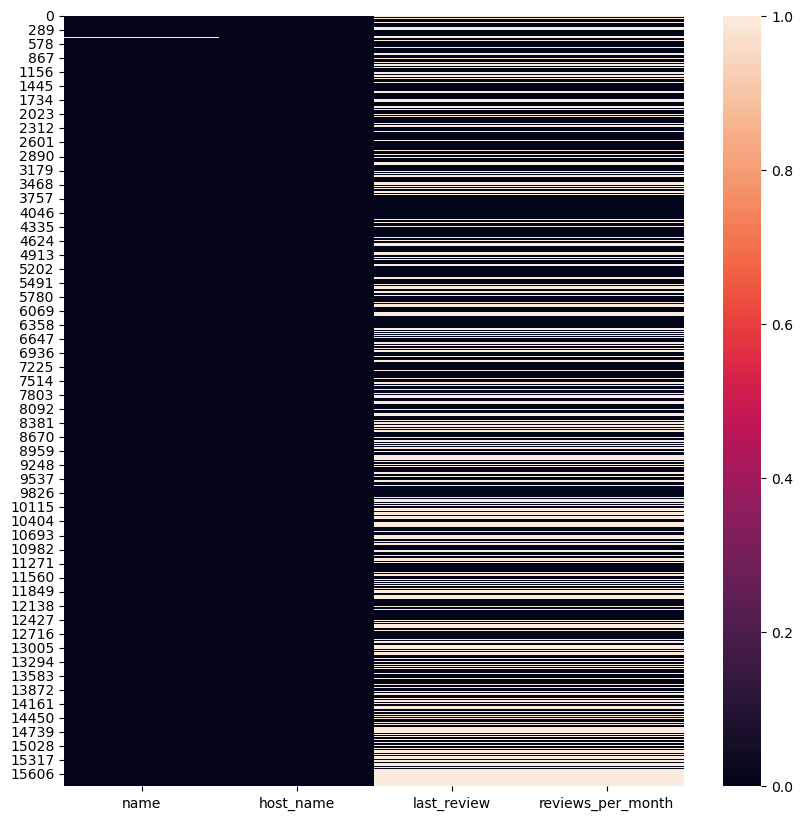

In [11]:
# Missing Data Spread 
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

Insight
Based on graph :

1. in `host_name` found 1 **missing value**
2. in `name` found 8 **missing value** with percentage of <0,06% of total data. 
3. in `last_review` and `reviews_per_month` found 36.52% **missing value**

Treatment : 
1. for rows with **missing value**  less than 0.5%, the row/s will be dropped.
2. for rows with **missing value**  more than 0.5%, the row/s will be filled with other datas and or zero (0)

In [12]:
df.dropna(subset=['name','host_name'],inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df.drop('last_review',axis=1,inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6028\1528296593.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


| Column Name           | Description |
|-----------------------|-------------|
| `id`                  | Unique identifier for each listing. |
| `name`                | Title of the listing. |
| `host_id`             | Unique ID of the host. |
| `host_name`           | Name of the host. |
| `neighbourhood_group`| Not used in Bangkok; placeholder column. |
| `neighbourhood`      | Local area or district in Bangkok. |
| `latitude`            | Latitude coordinate of the listing. |
| `longitude`           | Longitude coordinate of the listing. |
| `room_type`           | Type of room offered: Entire home/apt, Private room, Shared room. |
| `price`               | Price per stay (might require division by nights). |
| `minimum_nights`      | Minimum number of nights required to book. |
| `number_of_reviews`   | Total number of reviews for the listing. |
| `reviews_per_month`   | Average number of reviews per month. |
| `calculated_host_listings_count` | Total number of listings by the same host. |
| `availability_365`    | Number of days the listing is available per year. |
| `price_per_night`     | Derived: price divided by minimum nights. |
| `recently_reviewed`   | Derived: True if the last review is within the past 6 months. |

This description helps clarify the context of each feature used in analysis and dashboard visuals.

In [13]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

After handling the treatment that we chose to do are: 
1. for missing values in `name` and `host_name`, the rows will be dropped.
2. for missing values in `reviews_per_month`, the rows will be filled with 0.
3. the column `last_review` will be dropped, because in this analysist the data will not be used. 

with post-handling checking we left with **9 less rows than before (15,845)** and **1 less column (15)**

Text(0, 0.5, 'Harga')

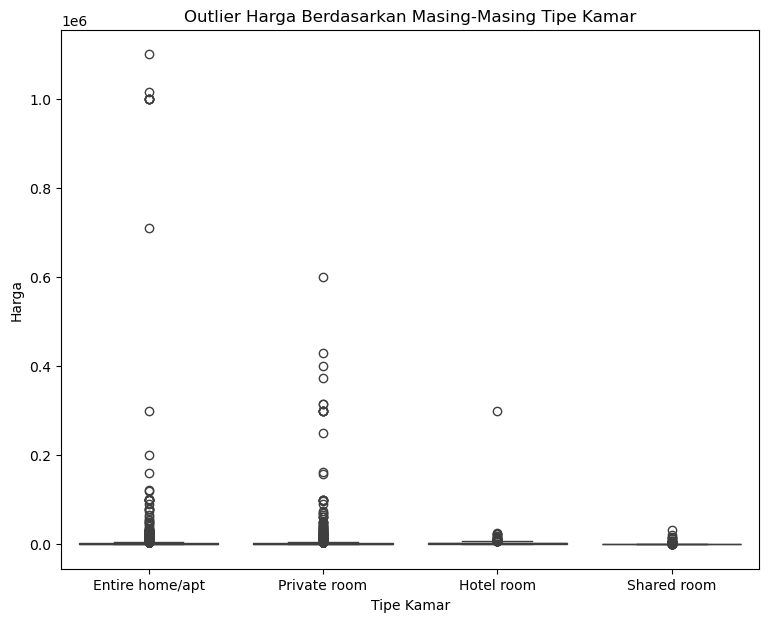

In [14]:

plt.figure(figsize=(9,7))
sns.boxplot(x='room_type',y='price',data=df)
plt.title('Outlier Harga Berdasarkan Masing-Masing Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga')

# Price checking for *Entire Home* Room Type

In [15]:
# # Price Checking for Entire Home/Apt
price_entire_home = df[df['room_type']=='Entire home/apt'][['price']].sort_values(by='price',ascending=False)
display(price_entire_home.head())
display(price_entire_home.tail())

,price
12868,1100000
12300,1014758
6289,1000000
1779,1000000
4620,1000000


,price
11215,348
9657,346
1481,346
5246,337
10222,332


# Price checking for *Hotel Room* Room Type

In [16]:
# # Price Checking for Hotel Room 
price_hotel_room = df[df['room_type']=='Hotel room'][['price']].sort_values(by='price',ascending=False)
display(price_hotel_room.head())
display(price_hotel_room.tail())

,price
2668,300000
3415,24390
6281,23671
6283,23629
6282,23029


,price
8445,326
8983,318
2748,318
2770,318
11103,0


# Price checking for *Shared Room* Room Type

In [17]:
# Price Checking for Shared Room 
price_shared_room = df[df['room_type']=='Shared room'][['price']].sort_values(by='price',ascending=False)
display(price_shared_room.head())
display(price_shared_room.tail())

,price
7857,31200
6868,20895
2430,17316
5577,13852
5079,13000


,price
9636,303
15473,295
15456,280
15401,280
15455,280


In [18]:
# Column Drop room type with price = 0
df.drop(df[(df['room_type'] == 'hotel room') & (df['price'] == 0)].index, inplace=True)

## District-based categorization

Based on https://www.mdpi.com/sustainability/sustainability-13-11426/article_deploy/html/images/sustainability-13-11426-g001.png, districts in Bangkok can be categorized by 3 categories:
- Inner Zone
- Middle Zone
- Outer Zone

In Which will be used in our analysis.

In [19]:
df['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

In [20]:
def Zone(neighbourhood):
    if neighbourhood in ['Chatu Chak','Bang Sue','Dusit','Bang Rak','Bangkok Noi','Bangkok Yai','Khlong Toei','Ratchathewi','Parthum Wan','Pom Prap Sattru Phai','Phra Nakhon','Phaya Thai','Huai Khwang','Din Daeng','Sathon','Khlong San','Thon buri','Bang Kho laen','Yan na wa','Samphanthawong','Vadhana']:
        return 'Inner City'
    elif neighbourhood in['Sai Mai','Bang Kapi','Lat Phrao','Bang Khen','Bueng Kum','Chom Thong','Bang Na','Pra Wet','Suanluang','Saphan Sung','Khan Na Yao','Wang Thong Lang','Thung khru','Bang Khae','Bang Phlat','Phra Khanong','Rat Burana','Phasi Charoen']:
        return 'Middle City'
    elif neighbourhood in['Nong Chok','Lat Krabang','Min Buri','Khlong Sam Wa','Taling Chan','Lak Si','Don Mueang','Bang Khun thain','Bang Bon','Nong Khaem','Thawi Watthana']:
        return 'Outer City'
    else :
        return 'Unknown'

df['Zone'] = df['neighbourhood'].apply(Zone)

In [21]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Zone
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0,Inner City
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0,Middle City
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0,Middle City
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1,Inner City
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0,Middle City


In [22]:
# download file cleaning
df.to_csv('airbnbcleanedFInal.csv')

## LISTING SPREAD ANALYSIS

The main goal of this analysis is to analyze the listing's spread in Bangkok Aribnb, in which will be used as the base for future hosts listings. 

Base : 
1. What does the listing spread in Bangkok looks like
2. The characteristics of each city in bangkok and how it affects the listing spread

In [23]:
# Number of Listings by Zone
df = pd.read_csv('airbnbcleanedFInal.csv')
listing = df['Zone'].value_counts()
listing

Zone
Inner City     12307
Middle City     2891
Outer City       647
Name: count, dtype: int64

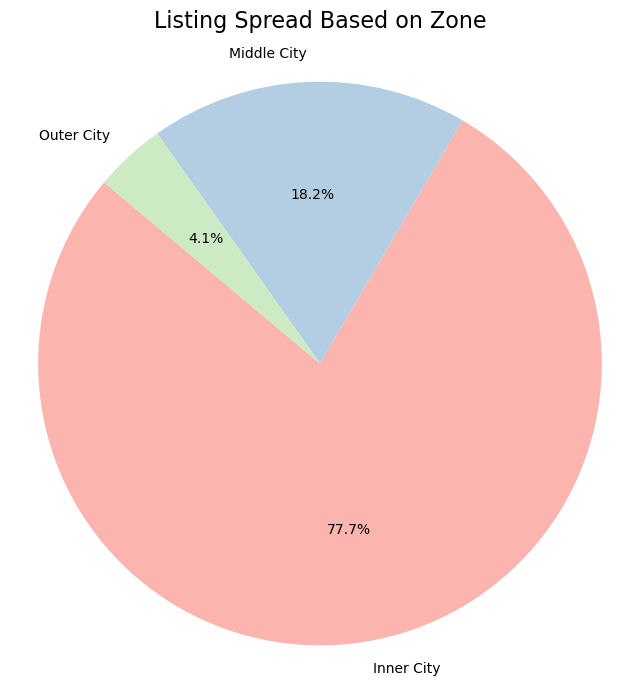

In [24]:
# Data Visualization
color = ['#fbb4ae','#b3cde3','#ccebc5']
plt.figure(figsize=(8,8))
plt.title('Listing Spread Based on Zone',pad= 20,size=16)
plt.pie(listing, labels=listing.index, autopct='%1.1f%%', startangle=140,colors=color)
plt.axis('equal')
plt.show()

Based on the Piechart above the most amount of listing are in **Inner City** with 77.7%, and then **Middle City** with 18.2%, and last **Outer City** with 4.1%

In [25]:
# District based grouping 
district = df.groupby(['neighbourhood','Zone'])[['name']].count().sort_values(by='name',ascending=False).reset_index()

# top
top_5 = district.head()
display(top_5)
top_5_by_city = district.groupby('Zone').head()
display(top_5_by_city)

bottom_5 = district.tail()
display(bottom_5)

#bottom
bottom_5_by_city = district.groupby('Zone').tail()
display(bottom_5_by_city)

,neighbourhood,Zone,name
0,Vadhana,Inner City,2151
1,Khlong Toei,Inner City,2096
2,Huai Khwang,Inner City,1125
3,Ratchathewi,Inner City,1113
4,Bang Rak,Inner City,827


,neighbourhood,Zone,name
0,Vadhana,Inner City,2151
1,Khlong Toei,Inner City,2096
2,Huai Khwang,Inner City,1125
3,Ratchathewi,Inner City,1113
4,Bang Rak,Inner City,827
7,Phra Khanong,Middle City,557
9,Bang Na,Middle City,457
13,Suanluang,Middle City,382
15,Bang Kapi,Middle City,259
17,Bang Phlat,Middle City,216


,neighbourhood,Zone,name
45,Bang Khun thain,Outer City,21
46,Nong Chok,Outer City,14
47,Thawi Watthana,Outer City,12
48,Nong Khaem,Outer City,9
49,Bang Bon,Outer City,5


,neighbourhood,Zone,name
25,Bang Kho laen,Inner City,140
27,Pom Prap Sattru Phai,Inner City,123
29,Samphanthawong,Inner City,114
32,Dusit,Inner City,91
33,Bangkok Yai,Inner City,90
38,Bueng Kum,Middle City,54
39,Rat Burana,Middle City,53
41,Saphan Sung,Middle City,45
42,Sai Mai,Middle City,40
44,Thung khru,Middle City,23


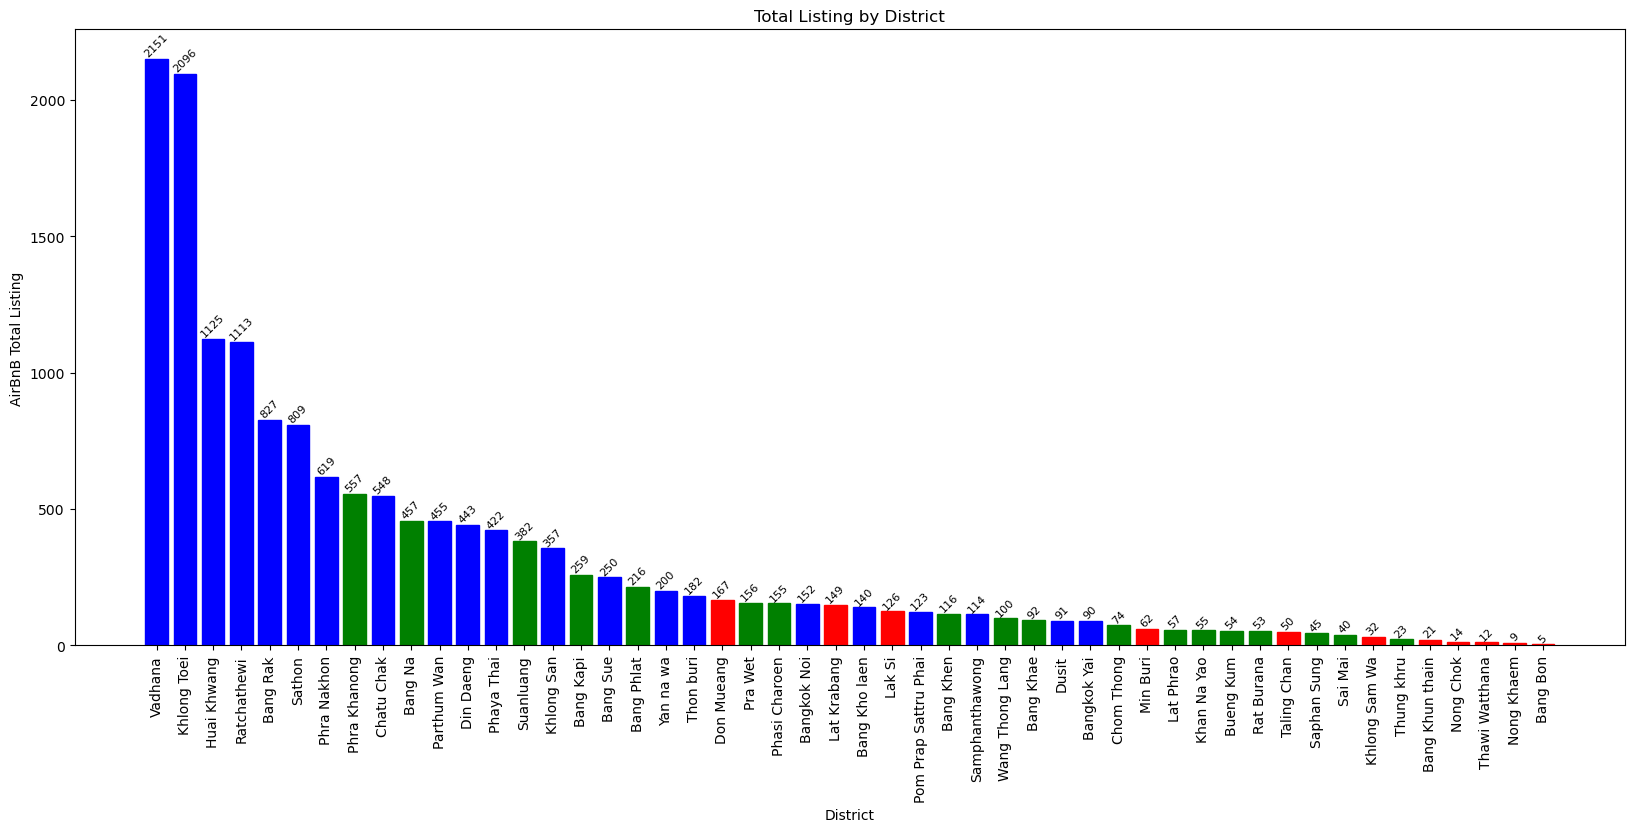

In [26]:
# Visualization
plt.figure(figsize=(20, 8))
bars = plt.bar(district['neighbourhood'], district['name'])  # Warna default

# Color by Zone
label_city_colors = {'Inner City': 'blue', 'Middle City': 'green', 'Outer City': 'red'}
for bar, label_city in zip(bars, district['Zone']):
    bar.set_color(label_city_colors.get(label_city, 'gray'))

# Labelling
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
             ha='center', va='bottom', rotation=45, color='black', fontsize=8)

# Labelling
plt.xlabel('District')
plt.ylabel('AirBnB Total Listing')
plt.title('Total Listing by District')
plt.xticks(rotation=90)  # Memutar label sumbu x agar lebih mudah dibaca

# Graph
plt.show()

Based on barchart above the highest listed porperties in AirBnB Bangkok are in Vadhana

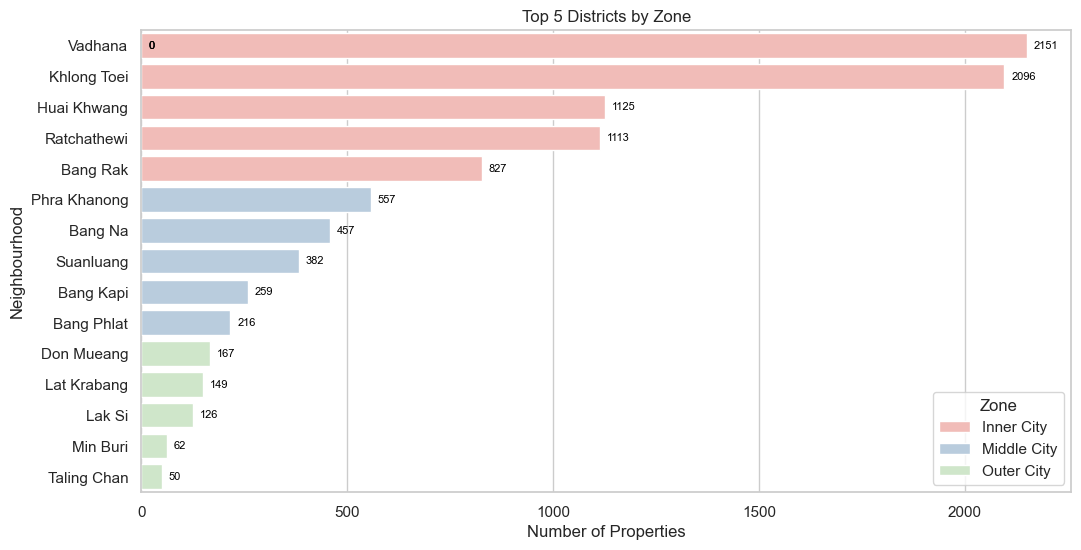

In [27]:
sns.set(style="whitegrid")

# Bar Chart 
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='name', y='neighbourhood', hue='Zone', data=top_5_by_city, palette='Pastel1')

# Labelling
plt.xlabel('Number of Properties')
plt.ylabel('Neighbourhood')
plt.title('Top 5 Districts by Zone')

# Legend
plt.legend(title='Zone')

# Adding value labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='left', va='center', fontsize=8, color='black', xytext=(5, 0),
                      textcoords='offset points')

# Plot
plt.show()

Based on barchart above the highest amount of properties are in Inner City, with the highest amount of properties listed are in Vadhana

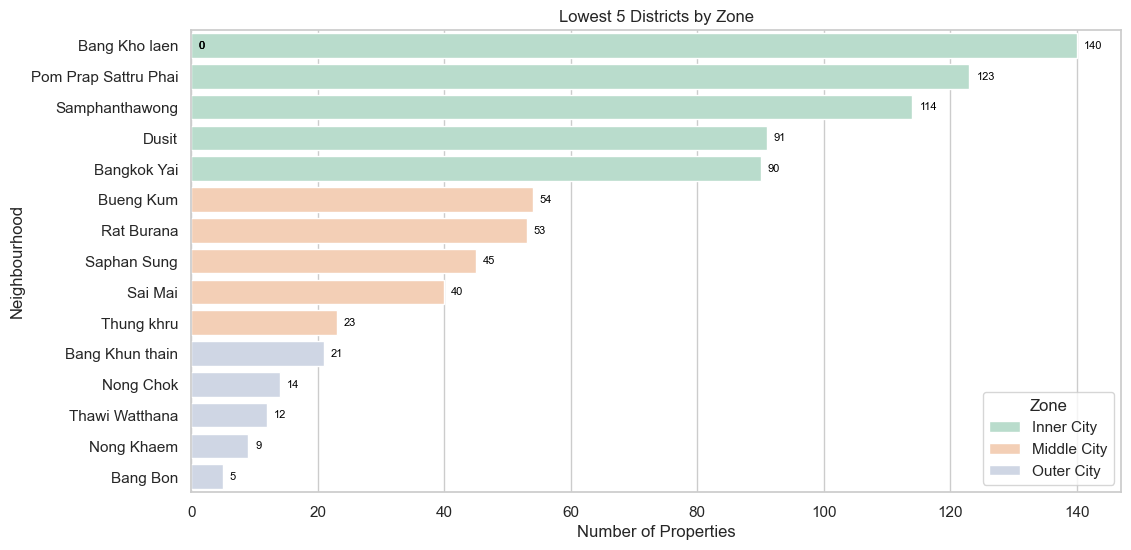

In [28]:
sns.set(style="whitegrid")

# Bar Chart 
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='name', y='neighbourhood', hue='Zone', data=bottom_5_by_city, palette='Pastel2')

# Labelling
plt.xlabel('Number of Properties')
plt.ylabel('Neighbourhood')
plt.title('Lowest 5 Districts by Zone')

# Legend
plt.legend(title='Zone')

# Adding value labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='left', va='center', fontsize=8, color='black', xytext=(5, 0),
                      textcoords='offset points')

# Menampilkan plot
plt.show()

Based on barchart above the lowest amount of properties are in Outer City, with the lowest amount of properties listed are in Bang Bon

## INSIGHTS

# Spread 
Highest spread found in Inner City with listing proportion of 78%, with Vandhana, Khlong Toei, Huai Khwang, Ratchathewi, and Bang Rak as the highest contributor. Meanwhile the lowest listing are in Outer City with Bang Khun Thain, Nong Chock, Thawi Watthana, Nong Khaem, dan Bang Bon.

The Characteristics for each Zone in Bangkok are as such: 

Inner City

Located in the heart of Bangkok, this part of Bangkok easily become the highest populated part of Bangkok. Other than that Inner City provides a historical places, places to go, and divert culture.

Middle City


Middle City is located between the inner city and the outer city. Some middle cities range from lush areas to thriving commercial areas. Middle cities feature a variety of housing, bustling shopping centers, and a vibrant economy. This is the area that is in the middle, presenting a mix of characteristics from the inner and outer cities.

Outer City

Outer cities, located on the outskirts of the city or further from the city center, often offer lush residential areas with private homes and large open spaces. Newer urban developments with modern infrastructure, industrial centers, and large shopping centers can be found in outer cities. Quieter neighborhoods and a higher quality of life are often characteristic of these areas.

It can be seen, from the distribution in each zone of Bangkok is not well distributed, in the Inner city zone there is still a distribution of less than 150 properties, then in the middle city zone there is still a distribution of less than 60 properties, while the outer city zone still has less than 10 properties but this is in line with the characteristics of this zone, namely a zone that is far from the city center.

CONCLUSION

Airbnb has 78% of listings in the Inner City zone, where this zone is the center of Bangkok which has various entertainment venues so that it becomes an attraction for tourists such as shopping centers, culinary, the largest bus terminal in Bangkok and so on. In addition, this district has public transportation that is easily accessible to tourists, such as taxis, buses, MRT, private vehicles and so on. Meanwhile, the lowest listings occur in the Outer city zone, which is a zone that is quite far from the city center. This zone provides a calm atmosphere that is not found in the city center and has a large open space. This zone is quite difficult to reach by public transportation, usually there are only public buses that do not reach all districts and private cars. In terms of distribution based on its district, the Inner and Middle City zones are not well distributed because there are still districts that have a small number of properties compared to other districts, even though this is a zone that has great opportunities to develop a business.

## ROOM TYPE ANALYSIS

The main goal of this analysis is to analyze the listing's room type in Bangkok Aribnb, in which will be used as the base of choosing which type of property future hosts will choose.

Base :

1. What is the most common room type listed in Bangkok AirBnb
2. How room type affects the customers preference in AirBnb booking

In [29]:
# number of listings by room type
room_type_counts = df['room_type'].value_counts()
room_type_counts

room_type
Entire home/apt    8911
Private room       5762
Hotel room          649
Shared room         523
Name: count, dtype: int64

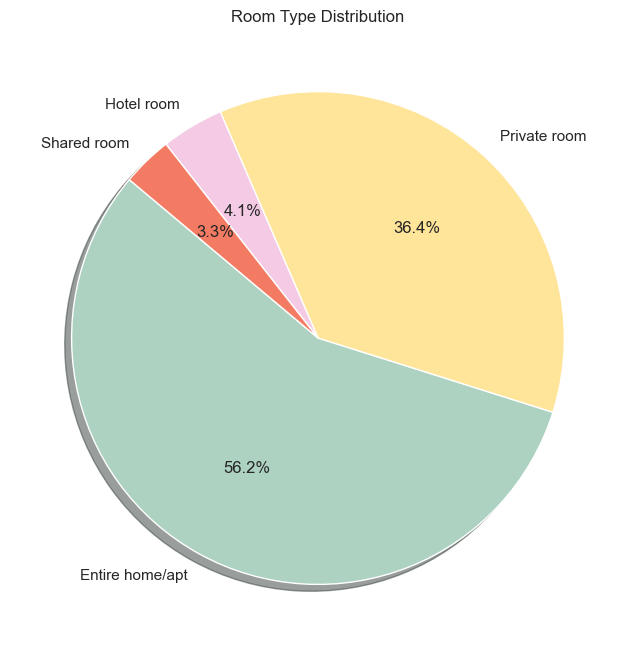

In [30]:
# Visualize the distribution of room types
colors = ['#add2c2', '#ffe599', '#f4cae4', '#f47b63']
plt.figure(figsize=(8,8))
plt.title('Room Type Distribution')
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140,shadow=True,colors=colors)
plt.show()

Highest room type listed in AirBnB Bangkok is Entire Home/apt Room Type with 56.2% of total Listed Properties in AirBnB Bangkok

In [31]:
# Number of Listings by Zone  and Room Type
type = df.groupby('Zone')['room_type'].value_counts().reset_index(name='count')
type

,Zone,room_type,count
0,Inner City,Entire home/apt,7169
1,Inner City,Private room,4106
2,Inner City,Hotel room,584
3,Inner City,Shared room,448
4,Middle City,Entire home/apt,1542
5,Middle City,Private room,1266
6,Middle City,Shared room,47
7,Middle City,Hotel room,36
8,Outer City,Private room,390
9,Outer City,Entire home/apt,200


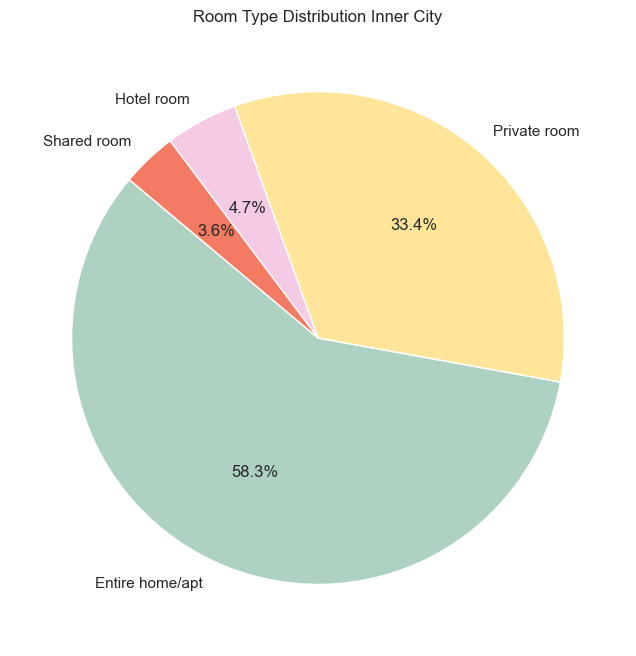

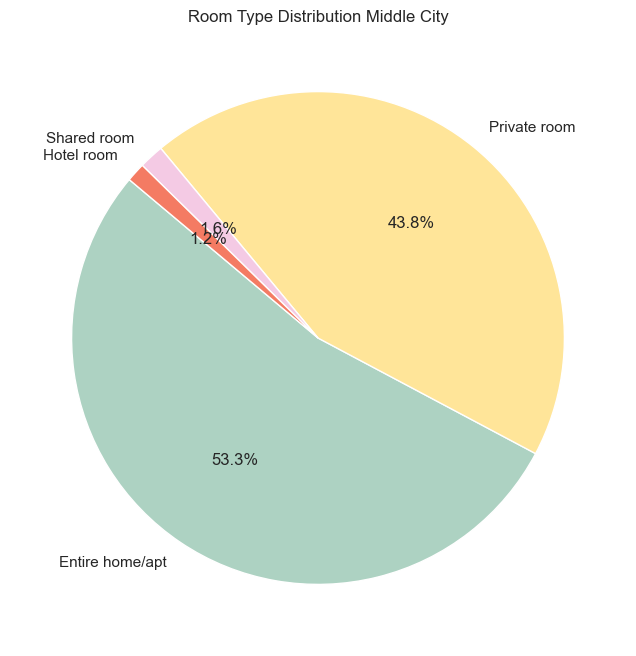

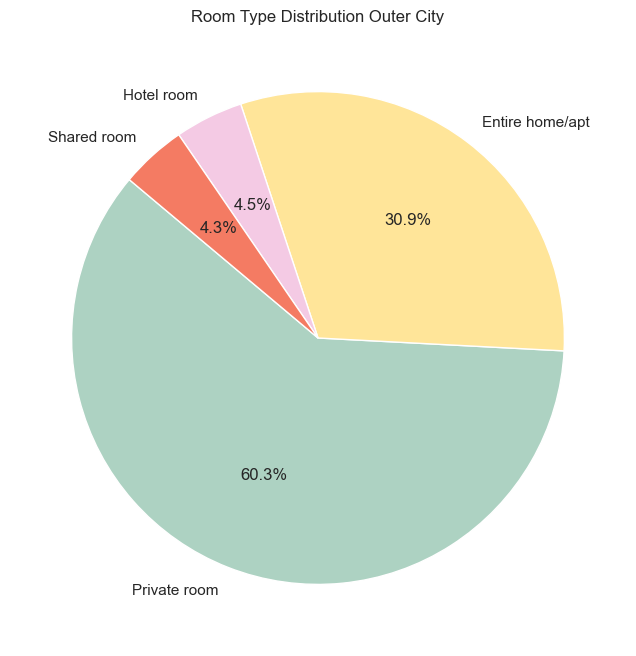

In [32]:
# Visualize the distribution of room types
cities = type['Zone'].unique()
colors = ['#add2c2', '#ffe599', '#f4cae4', '#f47b63']

# Looping untuk masing-masing zona
for city in cities:
    
    # Filter data untuk Zone kota tertentu
    city_data = type[type['Zone'] == city]

    # Data untuk pie chart
    labels = city_data['room_type']
    sizes = city_data['count']

    # Plot pie chart
    plt.figure(figsize=(8,8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,colors=colors)
    plt.title(f'Room Type Distribution {city}')
    plt.show()

1. Entire Home Room Type have the highest amount of percentage of properties listed in AirBnB bangkok in Inner City
2. Entire Home Room Type have the highest amount of percentage of properties listed in AirBnB bangkok in Middle City
3. Entire Home Room Type have the highest amount of percentage of properties listed in AirBnB bangkok in Outer City

In [33]:
# Number of Listings by Room Type and Neighbourhood
jumlah = df .groupby(['room_type','neighbourhood','Zone']).size().reset_index(name='count')

# Highest number of listings by room type and neighbourhood
result = jumlah.sort_values(by='count',ascending=False).groupby('room_type').head(1)
result

,room_type,neighbourhood,Zone,count
22,Entire home/apt,Khlong Toei,Inner City,1520
128,Private room,Vadhana,Inner City,542
155,Shared room,Phra Nakhon,Inner City,131
79,Hotel room,Vadhana,Inner City,105


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6028\3085641700.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='room_type', y='count', hue='neighbourhood', data=result, palette='pastel', ci=None)


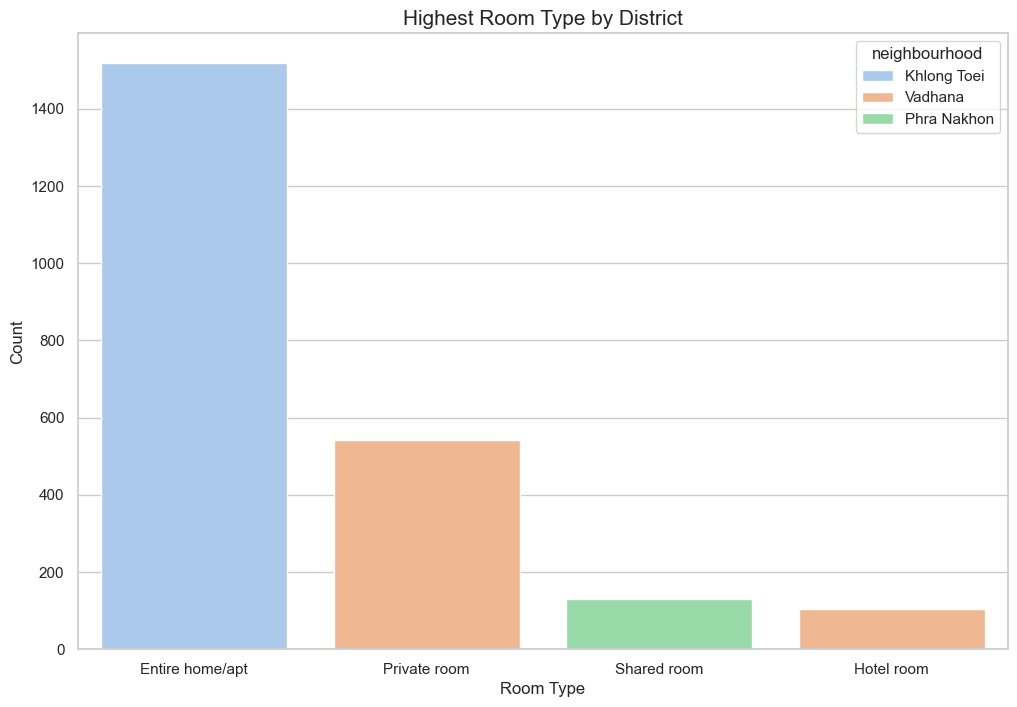

In [34]:
# Visualize the distribution of room types

plt.figure(figsize=(12, 8))
sns.barplot(x='room_type', y='count', hue='neighbourhood', data=result, palette='pastel', ci=None)
plt.title('Highest Room Type by District',size=15)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

The highest room type listed in AirBnB Bangkok is an Entire Home/apt Room Type, in Khlong Toei district.

In [35]:
district = df.groupby(['neighbourhood', 'Zone'])[['name', 'room_type']].count().sort_values(by='name').reset_index()

# Top 5 by Zone
top_5_by_city = district.groupby('Zone').apply(lambda group: group.nsmallest(5, 'name')).reset_index(drop=True)

# Room Type Count
top5_city = df.groupby(['neighbourhood', 'Zone', 'room_type'])[['name']].count().reset_index()
top5_city = pd.merge(top_5_by_city, top5_city, on=['neighbourhood', 'Zone'])

# Rename columns for clarity
top5_city = top5_city.rename(columns={'name_y': 'count', 'room_type_y': 'room_type'})

# Drop unnecessary columns
top5_city = top5_city.drop(['name_x', 'room_type_x'], axis=1)

# Tampilkan hasil
display(top5_city)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6028\3606572636.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_by_city = district.groupby('Zone').apply(lambda group: group.nsmallest(5, 'name')).reset_index(drop=True)


,neighbourhood,Zone,room_type,count
0,Bangkok Yai,Inner City,Entire home/apt,41
1,Bangkok Yai,Inner City,Hotel room,3
2,Bangkok Yai,Inner City,Private room,43
3,Bangkok Yai,Inner City,Shared room,3
4,Dusit,Inner City,Entire home/apt,12
5,Dusit,Inner City,Private room,71
6,Dusit,Inner City,Shared room,8
7,Samphanthawong,Inner City,Entire home/apt,45
8,Samphanthawong,Inner City,Hotel room,9
9,Samphanthawong,Inner City,Private room,47


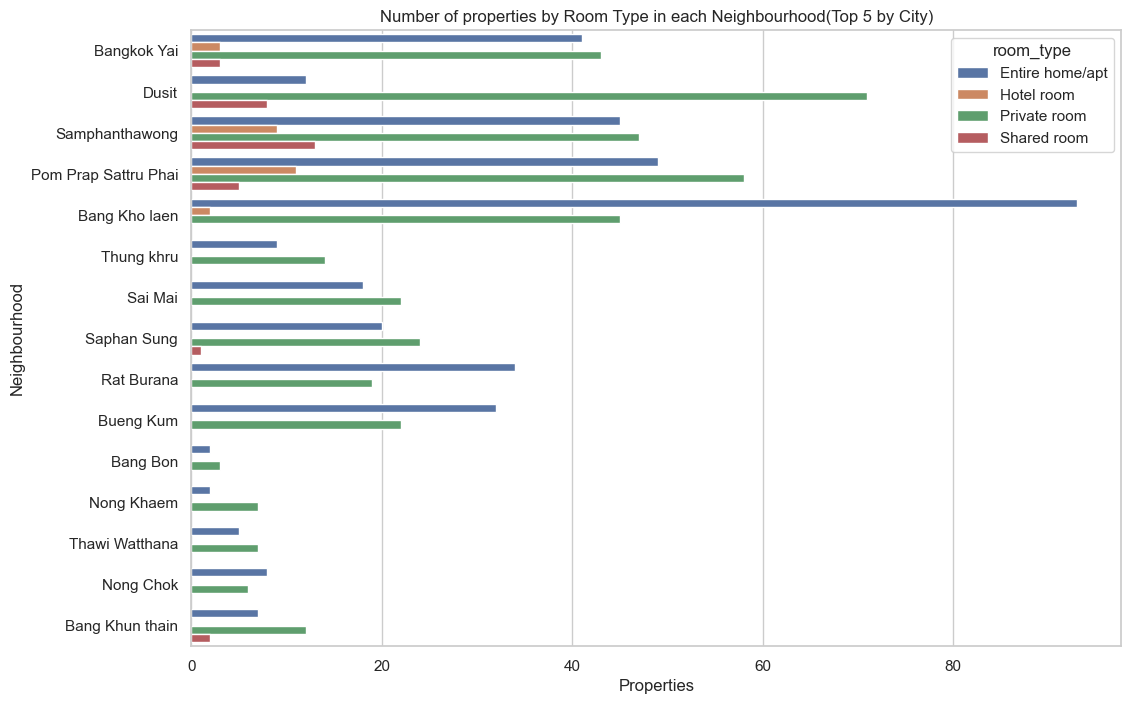

In [36]:
# Visualize the distribution of room types

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='neighbourhood', hue='room_type', data=top5_city)
plt.title('Number of properties by Room Type in each Neighbourhood(Top 5 by City)')
plt.xlabel('Properties')
plt.ylabel('Neighbourhood')
plt.show()

## INSIGHT 

1. The most listed Room Type are the Entire Home/Apts
2. Based on Zones :
- Inner City have 58.3 % from All property listed as Entire Home/Apts
- Middle City have 53% from all property listed as Entire Home/Apts
- Outer City have 60% from all property listed as Entire Home/Apts 
3. Highest district by each Room Type are: 
- Entire home/Apartement : Khlong Toei
- Private Room : Vandhana
- Shared Room : Phra Nakhon
- Hotel Room : Vadhana
4. The Characteristics of each Room Type is what decide wether the room or properties are booked/ listed
- Entire home/apartement have the highest listed, this room type offers Privacy, a good space for 2-4 persons and other usual listing properties facilities.
- Private room have a similar characteristics as Entire Home/Apartment with the downside are the Guest will be living along side the host, but in different room.
- Hotel Room also have a similar characteristics as Entire Home/Apartment with a smaller area and also less privacy. 
- Shared Room is the lowest type of room because the guest needs to share the room with other guests.
5. Most of the Properties that are listed in AirBnB Bangkok mostly only offer some of the room type but none provide all, this will give a chance for future host to list their properties with more variation of room types. 

# SUMMARY 

Based on our analysist the Room Type that have the highest listing number are the Entire Home/apt and Private Room, both of these rooms have the major proportions compared to the other 2. With the different from both of those two are the type of properties, size, facility, and others that are mostly conditional (based on the amount of Guest).

Based on the spread, the Inner and Middle zone will be the most benificial and profiting for future host to create a new listing in Bangkok, with the highest amount of room type listed in Inner City are in Vadhana, Khlong Toei, and Phra Nakhon. 

## PRICE ANALYSIS

Analyzing price will give tell us what affects the price of each listing by the host. 
In Which will be used as our baseline to analyze whether the future host should or not make and list their properties at certain Zone and or District. 


Base :

1. What are the average prices of each Room type ?
2. Hows the price average spread in each Zone in Bangkok ?

In [37]:
# Average Price by Zone
zone_price = df.groupby(['Zone'])[['price']].median()
zone_price

,price
Zone,
Inner City,1507.0
Middle City,999.0
Outer City,926.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6028\3664350856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='price', y=zone_price.index, data=zone_price.reset_index(), palette='pastel')


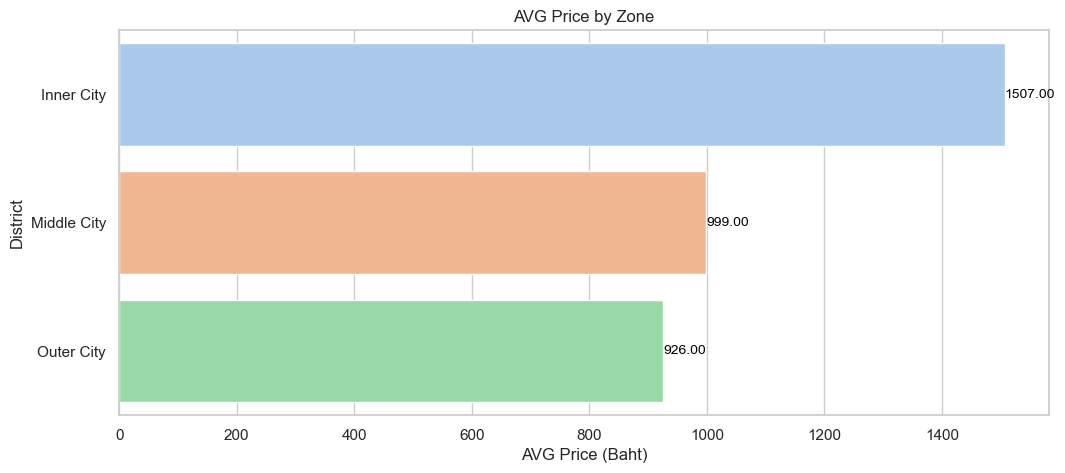

In [38]:
# Visualize the Average Price by Zone
plt.figure(figsize=(12,5))
bar_plot = sns.barplot(x='price', y=zone_price.index, data=zone_price.reset_index(), palette='pastel')

for index, value in enumerate(zone_price['price']):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)

plt.title('AVG Price by Zone')
plt.xlabel('AVG Price (Baht)')
plt.ylabel('District')
plt.show()

Based on barchart above Inner City have the highest price average than any other Zone in Bangkok

In [39]:
# Average Price by District
price = df.groupby(['neighbourhood','Zone'])[['price']].median().sort_values(by='price',ascending=False)
price

,,price
neighbourhood,Zone,
Nong Chok,Outer City,2539.0
Parthum Wan,Inner City,2400.0
Vadhana,Inner City,2000.0
Samphanthawong,Inner City,2000.0
Bang Rak,Inner City,1850.0
Pom Prap Sattru Phai,Inner City,1709.0
Khlong Toei,Inner City,1700.0
Ratchathewi,Inner City,1536.0
Taling Chan,Outer City,1502.5


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6028\2043787075.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='price', y='neighbourhood', data=price.reset_index(), palette='viridis')


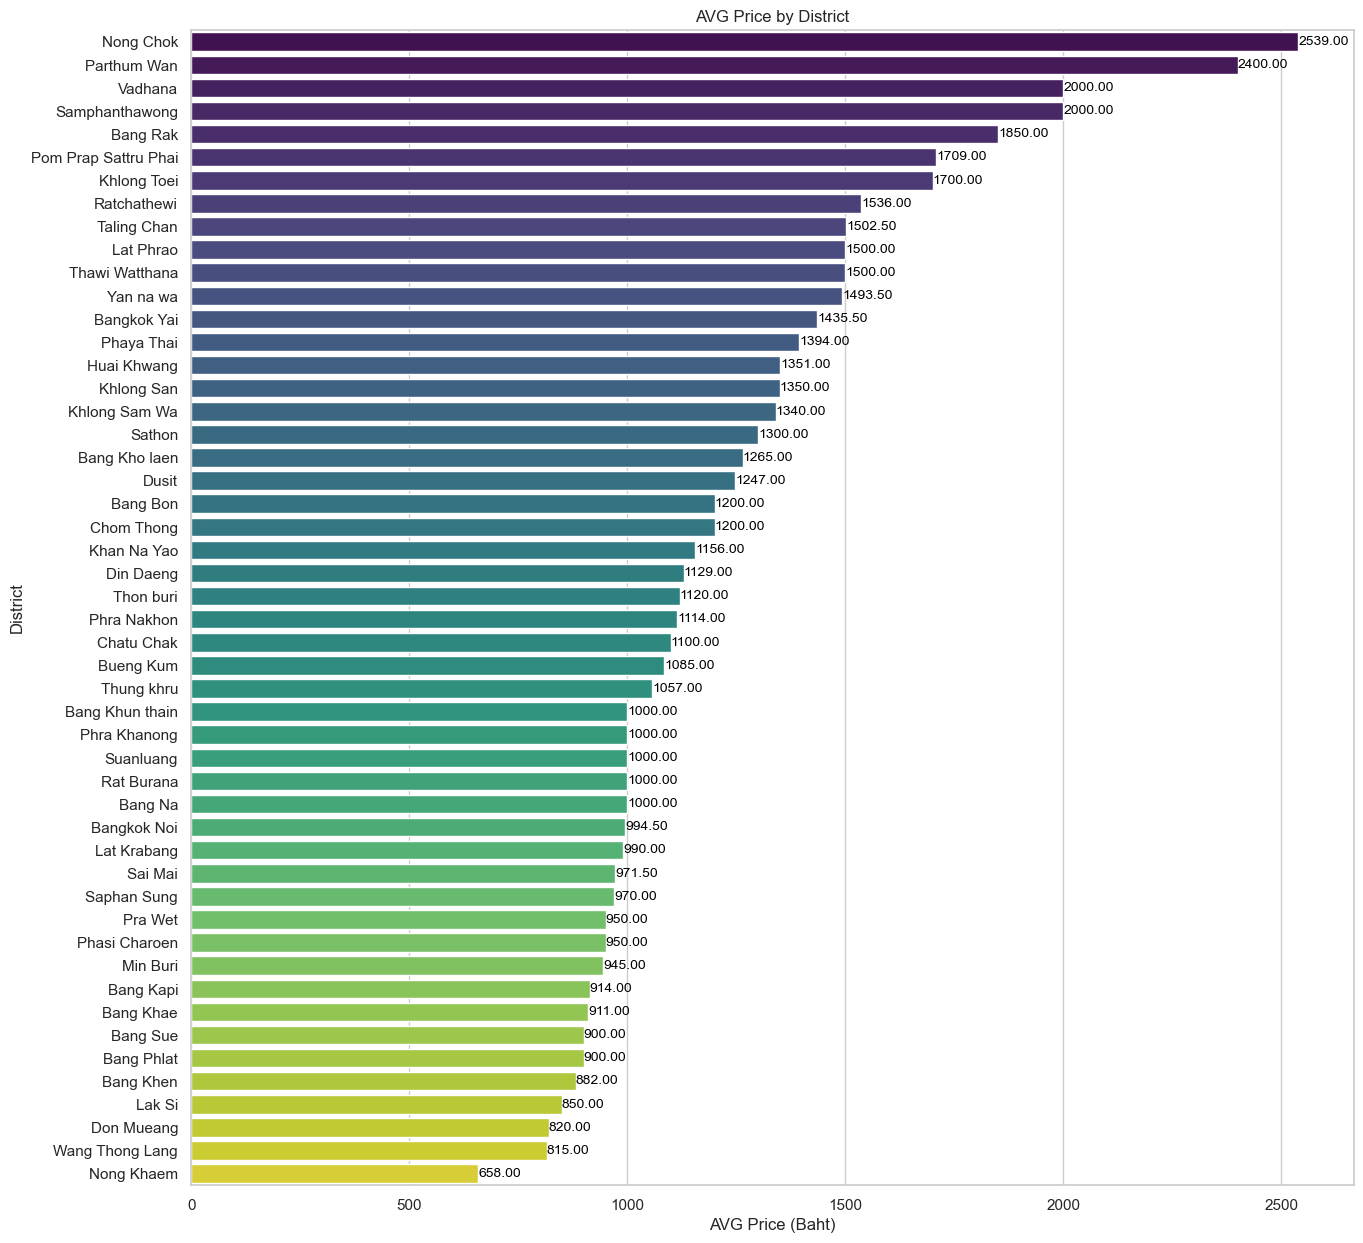

In [40]:
# Visualize the Price by District

plt.figure(figsize=(15,15))
bar_plot = sns.barplot(x='price', y='neighbourhood', data=price.reset_index(), palette='viridis')

for index, value in enumerate(price['price']):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)

plt.title('AVG Price by District')
plt.xlabel('AVG Price (Baht)')
plt.ylabel('District')
plt.show()

Based on barchart above, the district that have price average are:
1. Nong Chok
2. Parthum Wan 
3. Vadhana
4. Samphantawong
5. Bang Rak

.....

50. Nong Khaem

In [41]:
# Price by Room Type
price_room = df.groupby('room_type')[['price']].median().sort_values(by='price',ascending=False).reset_index()
price_room

,room_type,price
0,Hotel room,1700.0
1,Entire home/apt,1536.0
2,Private room,1213.5
3,Shared room,500.0


In [42]:
# Price by Room Type and Zone
Zone = df.groupby(['Zone','room_type'])[['price']].median()
Zone

price
Zone        room_type              
Inner City  Entire home/apt  1659.0
            Hotel room       1781.0
            Private room     1400.0
            Shared room       500.0
Middle City Entire home/apt  1000.0
            Hotel room       1363.0
            Private room      960.0
            Shared room       500.0
Outer City  Entire home/apt  1352.0
            Hotel room        990.0
            Private room      850.0
            Shared room       390.0

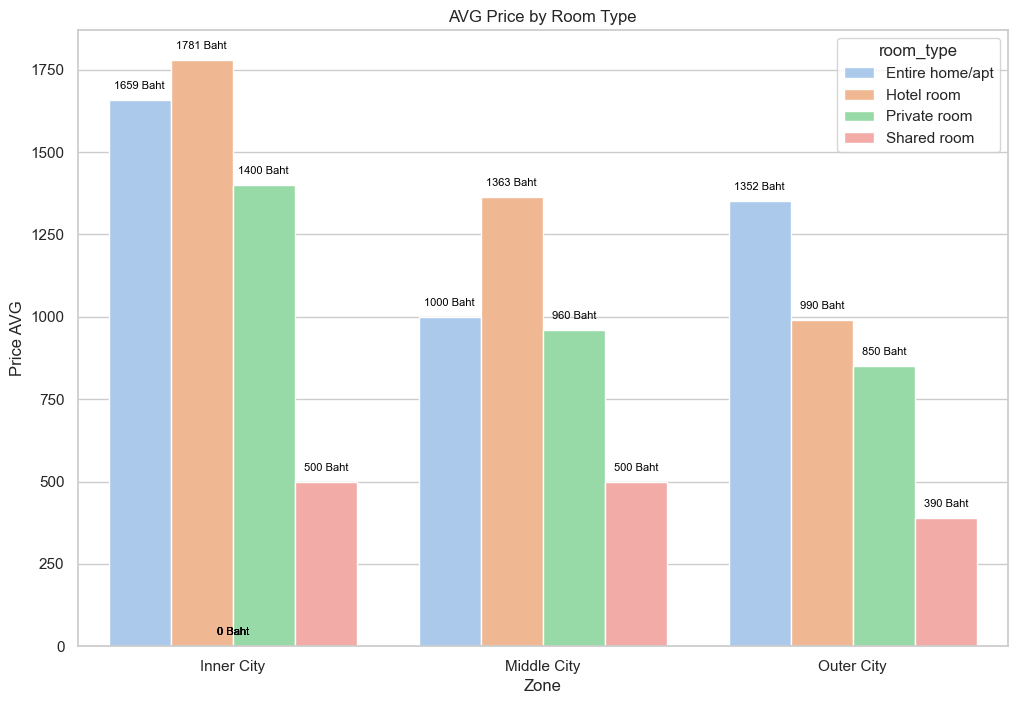

In [43]:
# Visualize the Price by Room Type and Zone

plt.figure(figsize=(12, 8))
sns.barplot(x='Zone', y='price', hue='room_type', data=Zone.reset_index(), palette='pastel')

# Zone
for p in plt.gca().patches:
    price_label = f"{int(p.get_height())} Baht"
    plt.gca().annotate(price_label, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('AVG Price by Room Type')
plt.xlabel('Zone')
plt.ylabel('Price AVG')
plt.show()

Hotel room tends to have a higher rent price in Inner City and Midde City Zone of Bangkok, meanwhile Entire Home/APT have the highest price average in Outer City.

In [44]:

# Group by district and price
district_price = df.groupby(['neighbourhood', 'room_type', 'Zone']).agg({'price': 'median', 'neighbourhood': 'count'}).rename(columns={'neighbourhood': 'property_count'}).reset_index()

# Price sorting
sorted_district_price= district_price.sort_values(by=['room_type', 'price'], ascending=[False, False])

# Display the top and bottom listings by room type
top_by_room_type = sorted_district_price.groupby('room_type')
display(top_by_room_type.head(1))
display(top_by_room_type.tail(1))

,neighbourhood,room_type,Zone,price,property_count
18,Bang Khun thain,Shared room,Outer City,7276.0,2
97,Parthum Wan,Private room,Inner City,2000.0,140
165,Yan na wa,Hotel room,Inner City,7943.0,8
85,Lat Phrao,Entire home/apt,Middle City,3900.0,26


,neighbourhood,room_type,Zone,price,property_count
137,Saphan Sung,Shared room,Middle City,313.0,1
94,Nong Khaem,Private room,Outer City,501.0,7
3,Bang Kapi,Hotel room,Middle City,600.0,1
161,Wang Thong Lang,Entire home/apt,Middle City,800.0,33


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6028\2437476006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='price', y='room_type', data=price_room, palette='pastel')


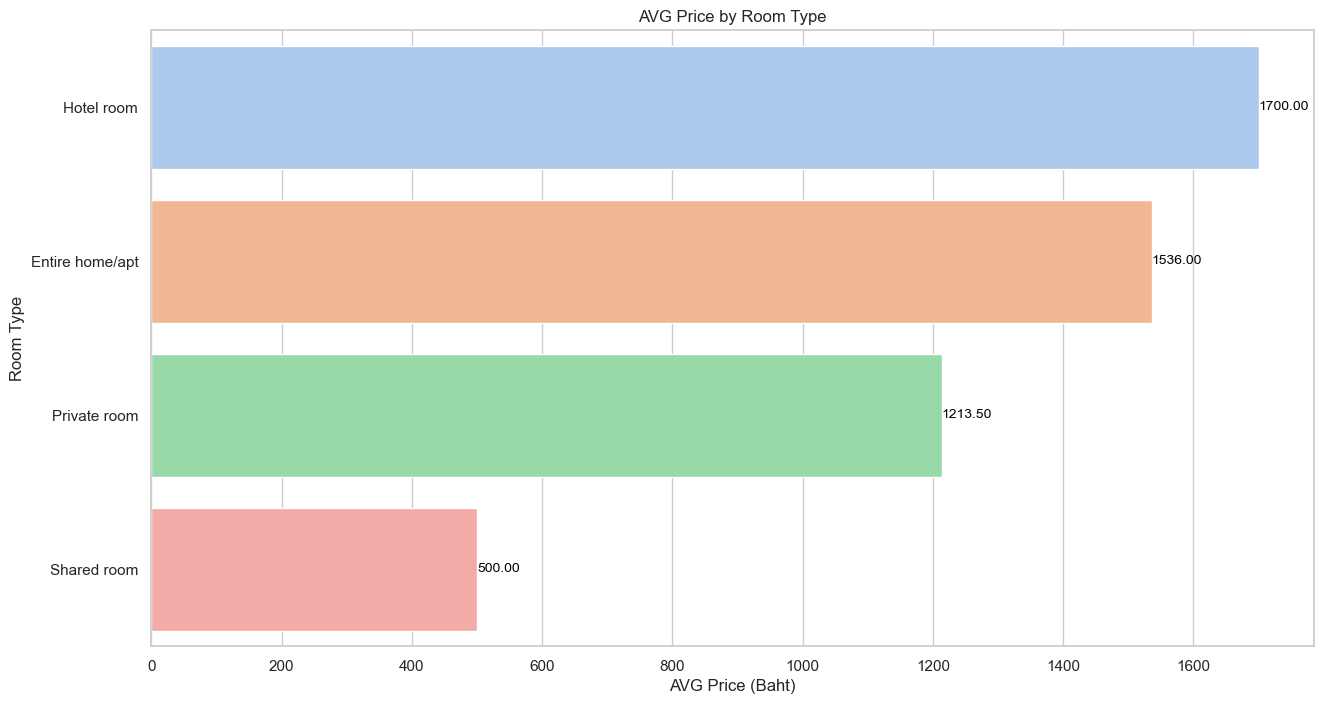

In [45]:
# Visualize the Price by Room Type and District
plt.figure(figsize=(15,8))
bar_plot = sns.barplot(x='price', y='room_type', data=price_room, palette='pastel')

# label
for index, value in enumerate(price_room['price']):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)

plt.title('AVG Price by Room Type')
plt.xlabel('AVG Price (Baht)')
plt.ylabel('Room Type')
plt.show()

Hotel Room have the highest price average of AirBnB property rent in Bangkok.

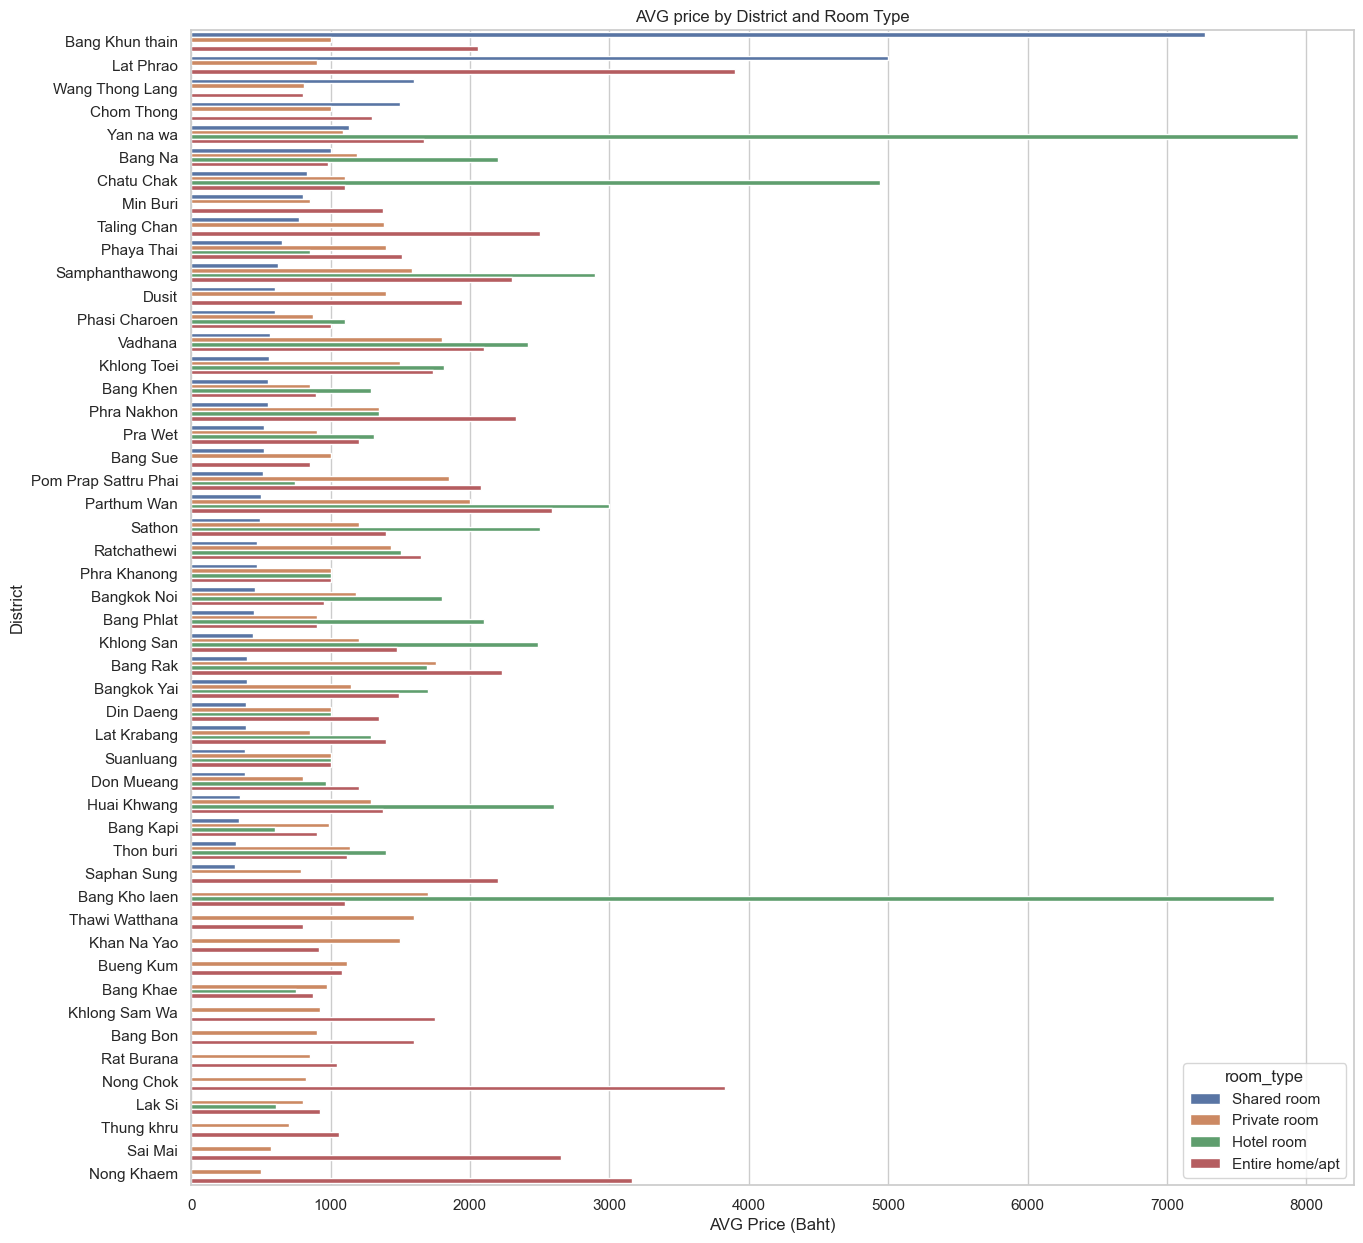

In [46]:
# AVG of Price by District and Room Type
plt.figure(figsize=(15, 15))
sns.barplot(x='price', y='neighbourhood', hue='room_type', data=sorted_district_price, estimator=np.median)
plt.title('AVG price by District and Room Type')
plt.xlabel('AVG Price (Baht)')
plt.ylabel('District')
plt.show()

Based on the barchart above, Yan na Wa district have the highest average price for Hotel Rooms, Bang khun Tain for shared room, Nong Chok for Entire Room, and Parthum Wan for Private Room.

In [47]:
data = df[['neighbourhood', 'Zone', 'room_type', 'price']]
# AVG Price by Room type and District
average_prices = data.groupby(['neighbourhood', 'Zone', 'room_type'])[['price']].median().reset_index()
# Gabungkan informasi rata-rata harga dengan DataFrame top5_city
top_5_1 = pd.merge(top5_city, average_prices,
                                         on=['neighbourhood', 'Zone', 'room_type'])

# Tampilkan hasil
display(top_5_1)

,neighbourhood,Zone,room_type,count,price
0,Bangkok Yai,Inner City,Entire home/apt,41,1490.0
1,Bangkok Yai,Inner City,Hotel room,3,1700.0
2,Bangkok Yai,Inner City,Private room,43,1143.0
3,Bangkok Yai,Inner City,Shared room,3,400.0
4,Dusit,Inner City,Entire home/apt,12,1939.5
5,Dusit,Inner City,Private room,71,1400.0
6,Dusit,Inner City,Shared room,8,600.0
7,Samphanthawong,Inner City,Entire home/apt,45,2300.0
8,Samphanthawong,Inner City,Hotel room,9,2900.0
9,Samphanthawong,Inner City,Private room,47,1586.0


# INSIGHT

Based on the graph above:

It can be seen that the average rental price in Bangkok ranges from 658 - 2,539 Baht

The highest average rental price based on the city section is the Inner City section, which is 1,507 Baht

Middle City and Outer City have average rental prices that are not too far apart with an average price above 920 Baht

If based on the district, Nong Chock has the highest average rental price, which is 2,539 Baht

Average rental price based on room type:
- Hotel room type is 1700 Baht, with a price range of 600-8000 Baht
- Entire Home/apt room type 1536 Baht, with a price range of 800-3900 Baht
- Private room type 1213.5 Baht, with a price range of 500-2000 Baht
- Shared room type 500 Baht, with a price range of 310-7300 Baht

Average rental price based on room type in each part of Bangkok:

Inner City

Entire Home/apt: 1659 Baht
Hotel: 1781 Baht
Private Room: 1400 Baht
Shared Room: 500 Baht
Middle City

Entire Home/apt: 1000 Baht
Hotel: 1363 Baht
Private Room: 960 Baht
Shared Room: 500 Baht
Outer City

Entire Home/apt : 1352 Baht
Hotel : 990 Baht
Private Room : 850 Baht
Shared Room : 390 Baht


Average rental price for room type based on district :

The highest hotel room type occurs in the Ya Na Wa district, which is 7943 Baht. In this district there are 8 choices for this room type
The highest Entire home/apt room type occurs in the Lat Phrao district, which is 3900 Baht. In this district there are 26 choices for this room type
The highest Shared room type occurs in the Bang Khun Thain district, which is 7276 Baht. In this district there are 2 choices for this room type
The highest private room type occurs in the Parthum Wan district, which is 2000 Baht. In this district there are 140 choices for this room type
After conducting an Anova test whether there is a difference in price between the room type and zone, it was found that the p_value of both was more than 0.05 so it can be said that the room type and zone provide less difference in price in terms of statistics.

# SUMMARY

The average rental price in Bangkok city ranges from 658-2539 Baht, Inner city is a zone that has the highest average rental price of 1507 Baht. Each type of room in each Bangkok zone has a price range that varies, if in Inner City and Outer City the highest room type is Entire Home/apt, while for the Middle zone the highest is the Hotel room type. When viewed based on price, Zone and room type do not provide much difference in rental prices for each room type.

## CONCLUSION
Based on the graph above, it can be concluded that:

Airbnb has 78% of listings in the Inner City zone, where this zone is the center of Bangkok which has various entertainment venues so that it becomes an attraction for tourists such as shopping centers, culinary, the largest bus terminal in Bangkok and so on. In addition, this district has public transportation that is easily accessible to tourists, such as taxis, buses, MRT, private vehicles and so on. Meanwhile, the lowest listings occur in the Outer city zone, which is a zone that is quite far from the city center. This zone provides a calm atmosphere that is not found in the city center and has a large open space. This zone is quite difficult to reach by public transportation, usually there are only public buses that do not reach all districts and private cars. In terms of distribution based on its district, the Inner and Middle City zones are not well distributed because there are still districts that have a small number of properties compared to other districts, even though this is a zone that has great opportunities to develop a business.

The most common room types are Entire Home/apt and private room. Both types have a very high proportion in each zone. The facilities provided by these two types are quite different, if the entire home has facilities like a house, while the private room only provides rooms like a hostel or guesthouse.

When viewed based on the district, it turns out that not all districts have all types of rooms. Especially in the inner and middle zones which can be an opportunity to expand the airbnb business by providing all types of rooms available. The number of available room types is most dominant in the inner city areas such as Khlong Toei, Vandhana, and Phra Nakhon. 

The average rental price in Bangkok ranges from 658-2539 Baht, the Inner city is the zone with the highest average rental price of 1507 Baht. Each type of room in each Bangkok zone has a price range that varies, if in the Inner City and Outer City the highest room type is Entire Home/apt, while for the Middle zone the highest is the Hotel room type. 


## RECOMMENDATION 
1. Inner City and Middle City Expansion:
The inner and middle city zones have great potential for the growth of the airbnb business, it is recommended to expand the number of listings through districts where the distribution of properties is still small. Although the Outer zone has the lowest number of listings among other zones, this zone has the potential to develop this airbnb business through characteristics that are not found in the inner and outer cities.

2. Room Type Options:
Entire Home/apt and private room are the most common types among the others, but there is an opportunity to attract more customers with the variety of rooms provided, namely hotels and shared rooms. This is done to provide users with a reference for the choice of property they want to rent, for both types are quite rare in some districts such as in districts with the lowest number of properties.
Rental Prices for Districts with the Lowest Number: Apply a smart pricing strategy to increase competitiveness. This rental price reference is based on the average of the price considering the zone, district and room type available. This price can be a reference for prospective listings to rent their property through airbnb especially for districts with the lowest number of properties.

3. Average Price Reference :

Inner
- Tipe Hotel : 700 - 7800
- Tipe Entire Home/Apartement : 1000 - 2100
- Tipe Private : 1100 - 1900
- Tipe Shared : 400 - 650

Middle

- Tipe Hotel : 900 - 2700
- Tipe Entire Home/Apartement : 900 - 1400
- Tipe Private : 500 - 1200
- Tipe Shared Room : 300 - 500

Outer

- Tipe Hotel : 800 - 3900
- Tipe Entire Home/Apartement : 900 - 1000
- Tipe Private : 500 - 1600
- Tipe Shared : 900 - 7300